## Perceptron

**Perceptron** is one of the oldest ML algorithm, originally proposed by Frank Rosenblatt in 1957 (*The Perceptron: A Perceiving and Recognizing Automaton, F.Rosenblatt, Cornell Aeronautical Laboratory, 1957). 

Maths of **Perceptron** algorithm is like this, say we have an input vector $x$ (of $N$ features) and $w$ weights corresponding to $N$ features. Weights and inputs are combined in a net-input $z=w^Tx + b$. Where $b$ is the bias term. Net-input $z$ is passed to an activation function $\phi(z)$ defined as:


$\phi(z) = \begin{cases} 1 & \mbox{if } z \ge 0 \\ -1 & \mbox{otherwise} \end{cases}$.

### Perceptron Learning Rule

$\hat{y}^{(i)}$ is the output value of the class label predicted by the unit step function, $y^{(i)}$ is the actual value of the class label. $\eta$ is the learning rate. Perceptron learning algorithm can be written as:

$w_j = w_j + \Delta w_j$ where $w_j$ is the $j^{th}$ weight, and $\Delta w_j$ is defined as:

$\Delta w_j = \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)}$ 

Its important to note that convergence of **Perceptron** is only guaranteed if the two classes are *linearly separable* and the learning rate is sufficiently small.

Below we will implement **Perceptron**.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

In [2]:
#Load the iris dataset
s = os.path.join('https://archive.ics.uci.edu','ml',
                 'machine-learning-databases',
                 'iris','iris.data')

In [3]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [4]:
#Select sentos and versicolor
y = df[(df[4] == 'Iris-setosa') | (df[4] == 'Iris-versicolor')][4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df[(df[4] ==  'Iris-setosa') | (df[4] == 'Iris-versicolor')][[0,2]].values

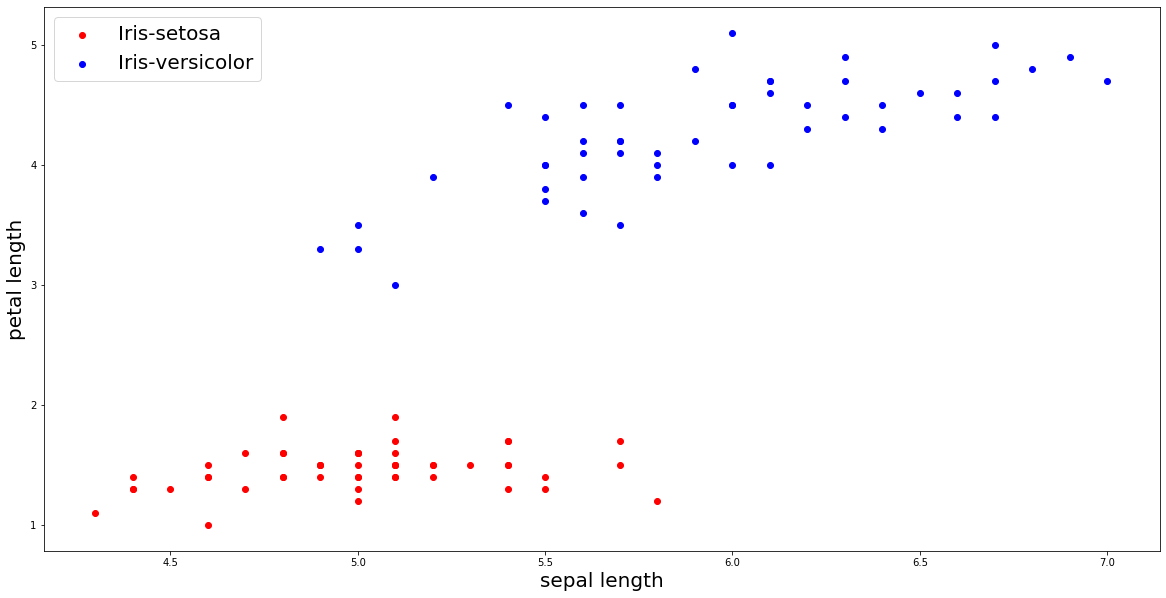

In [8]:
#Plot
plt.figure(figsize=(20,10))
plt.scatter(X[:50,0],X[:50,1], color='r', label='Iris-setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='b',label='Iris-versicolor')
plt.xlabel('sepal length', fontsize=20)
plt.ylabel('petal length', fontsize=20)
plt.legend(fontsize=20)

In [12]:
#Lets use Perceptron from sklearn 
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X,y)

Perceptron()

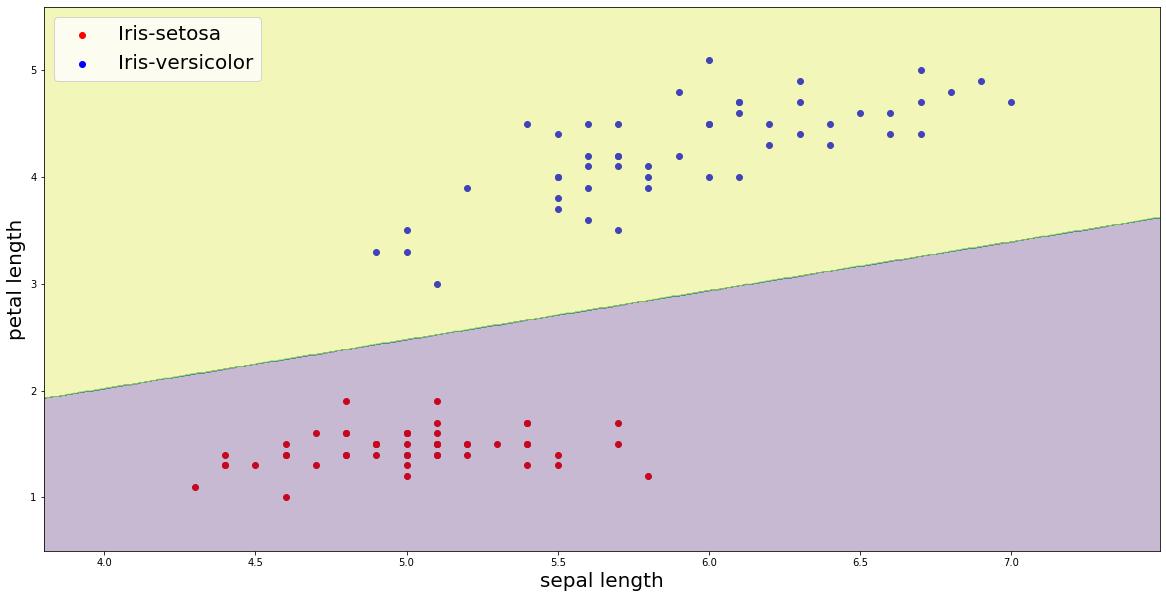

In [14]:
def plotDecisionBoundary(X):
    #Plot the decision boundary
    plt.figure(figsize=(20,10))
    plt.scatter(X[:50,0],X[:50,1], color='r', label='Iris-setosa')
    plt.scatter(X[50:100,0],X[50:100,1], color='b',label='Iris-versicolor')
    plt.xlabel('sepal length', fontsize=20)
    plt.ylabel('petal length', fontsize=20)
    plt.legend(fontsize=20)

    xx1, xx2  = np.meshgrid(np.arange(X[:,0].min()-0.5,X[:,0].max()+0.5,0.01), np.arange(X[:,1].min()-0.5,X[:,1].max()+0.5,0.01))
    X_grid = np.array([xx1.ravel(), xx2.ravel()]).T
    Y_grid = clf.predict(X_grid)
    Y_grid = Y_grid.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Y_grid, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
plotDecisionBoundary(X)

In [ ]:
#Now lets implement perceptron ourselevs
